# Gamma Distribution

## Introduction

In this chapter we'll introduce the Exponential Distribution a one parameter distribution that is a special case of the Gamma distribution and, of course, the Gamma distribution.  The Gamma distribution is used to model random durations of time until a next event.  What each event is, really only depends on the context of the process being modeled.  A general example might be time until the end of the life of someone or something.  The Gamma distribution is also used to model random volumes, e.g. rainfall.

## Estimating Parameters

Pedagogically, the Exponential and Gamma distributions will provide us insight on the difference between the likelihood estimate of population parameters and estimates of the mean of a random variable.

## Exponential Distribution

Let $X \sim \text{Exponential}(\beta)$.  Then $X$ has probability density function

$$ \text{exponential}(x | \beta) = \beta\exp{(-\beta x)} $$

for $x \geq 0$ and $\beta > 0$.  The parameter $\beta$ measures the rate at which events occur.  From this, it's easy enough to verify the mean of an exponential random variable is $\mathbb{E}(X) = 1 / \beta$ as derived from

$$ \mathbb{E}(X) = \int_0^{\infty} x \, d\text{ Exponential}(x).$$

Consider a random sample that measures days between rain events at the Winnipeg International Airport (Canada), from the R library DAAG {% cite Maindonald:2015 %}.  These data measure the time between rain events, and are thus necessarily positive as the density plot below shows.  The maximum likelihood estimate of the rate parameter is $\hat{\beta} = N / \sum_{n=1}^N X_N$.  The exponential density function with an estimated rate parameter $\hat{\beta}$ is drawn over the density plot. 

In [2]:
import numpy as np
import pandas as pd
import bplot as bp
from scipy.stats import expon as exponential, gamma

bp.LaTeX()
bp.dpi(300)

In [2]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/droughts.csv")
beta = 1 / df['length'].mean()

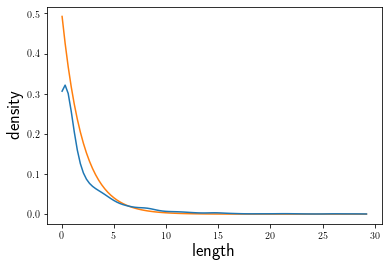

In [6]:
# true PDF evaluated at estimate of β
x = np.linspace(df['length'].min(), df['length'].max(), 101)
fx = exponential.pdf(x, scale=1 / beta)
bp.curve(x, fx, color='tab:orange')

# estimation of the density itself
bp.density(df['length'])

bp.labels(x='length', y='density', size=18)

# Gamma Distribution

Let $X \sim \text{Gamma}(\alpha, \beta)$.  Then $X$ has probability density function

$$ \text{gamma}(x | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha - 1} \exp{ (-\beta x) } $$

for $x \geq 0, \alpha > 0$, and $\beta > 0$.  Notice that when $\alpha = 1$, the exponential density function is recovered since the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) evaluated at $1$ is equal to $1$, $\Gamma(1) = 1$.

The Gamma distribution has one parameter more than the exponential distribution.  In general, more parameters in a model will enable better adaption to the data.  Don't read too closely into this though, better adaption to a dataset does not guarantee better predictions.  We'll consider this point more closely later on in the course.

The second parameter $\alpha$ is called the shape parameter.  Because the shape parameter appears inside the gamma function, there is no closed form for the maximum likelihood estimator of $\alpha$.  Instead of maximizing the likelihood function by hand, we'll use a computer to approximate the parameters that maximize the likelihood function of the Gamma density function.

The computer maximized likelihood for the gamma density function applied to the same dataset above gives estimates $\hat{\alpha} = 0.472$ and $\hat{\beta} = 0.24$.  Below, the gamma density function with $(\hat{\alpha}, \hat{\beta})$ overlays the density plot for these data.  We see that the Gamma distribution fits these data better than the Exponential distribution.  This happens because the Gamma distribution has one more parameter than the Exponential distribution.

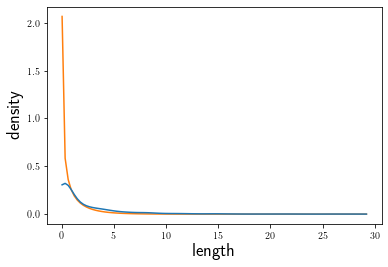

In [8]:
gx = gamma.pdf(x, a=0.472, scale=1 / beta)
bp.curve(x, gx, color='tab:orange')

# estimate of density itself
bp.density(df['length'])

bp.labels(x='length', y='density', size=18)